# eCommerce Customer Service Satisfaction

## About Dataset
The dataset captures customer satisfaction scores for a one-month period at an e-commerce platform called Shopzilla (a pseudonym). It includes various features such as category and sub-category of interaction, customer remarks, survey response date, category, item price, agent details (name, supervisor, manager), and CSAT score etc.

Note: Please be advised that the authentic information has been obfuscated, and the dataset has been fabricated using the Faker library to ensure the concealment of genuine details

**Data Source:** https://www.kaggle.com/datasets/ddosad/ecommerce-customer-service-satisfaction?resource=download 

### Problem Statement
Shopzilla is facing high cost for customer acquisition, which affects it’s profit. Study shows that customer lifetime value is directly proportional to the retention rate. A 5% increase in customer retention can produces more than 25% increase in profit. The company is currently working to improve customer service quality, enhance overall customer satisfaction, and increase customer retention.

### Objectives
1. Identify key drivers of customer satisfaction by using decision tree
2. Conduct a time-series analysis to observe trends and patterns in customer satisfaction over the one-month period.
3. Enhance accuracy of model such that factors influencing both bad and good experience can be identified such that 
they may be rectified and reinforced
4. Classify CSAT score
5. Complete capstone by deadline

## Exploratory Data Analysis

### Import Libraries

In [1]:
# Import libraries.
import pandas as pd
import numpy as np

### Read in Data

In [2]:
df = pd.read_csv('Customer_support_data.csv')
df.columns = df.columns.str.replace(' ', '_') # Rename header Ex: Unique id to Unique_id
df.columns = df.columns.str.lower() # Rename header Ex: Unique_id to unique_id

In [3]:
df.head(3)

,unique_id,channel_name,category,sub-category,customer_remarks,order_id,order_date_time,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5


### Create summary for df

In [4]:
def summary(df):
    # Create new data frame
    summy = pd.DataFrame(df.dtypes, columns=['data_type'])
    
    # Add columns
    summy['total_na'] = df.isnull().sum().values
    summy['duplicate'] = df.duplicated().sum()
    summy['unique'] = df.nunique().values
    return summy

print(df.shape)
summary(df)

(85907, 20)


,data_type,total_na,duplicate,unique
unique_id,object,0,0,85907
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
customer_remarks,object,57165,0,18231
order_id,object,18232,0,67675
order_date_time,object,68693,0,13766
issue_reported_at,object,0,0,30923
issue_responded,object,0,0,30262
survey_response_date,object,0,0,31


In [5]:
df['csat_score'].value_counts()

csat_score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64

### Fill null values
There are large number of null values in `customer_remarks`, `order_id`, `order_date_time`, `customer_city`, `product_category`,	`item_price`, and `connected_handling_time` columns. So, we'll check for correlation to see if we may drop them. 

Before that, we will first drop the `unique_id`, `customer_remarks`, `order_id`, and `order_date_time` column as it is not neccesary for modeling and it will take up much computing power when we dummify categorical variables. (Example: `Unique_id` have 85907 unique vallue)

In [6]:
df.drop(columns = ['unique_id', 'customer_remarks','order_id', 'order_date_time'], inplace = True)
df.head(1)

,channel_name,category,sub-category,issue_reported_at,issue_responded,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5


There are some duplicates found after dropping the colums, however, these duplicate need not be removed as they each have `unique_id` as shown in the previous summary, which shows that they are unique records.

In [7]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,9,3
category,object,0,9,12
sub-category,object,0,9,57
issue_reported_at,object,0,9,30923
issue_responded,object,0,9,30262
survey_response_date,object,0,9,31
customer_city,object,68828,9,1782
product_category,object,68711,9,9
item_price,float64,68701,9,2789
connected_handling_time,float64,85665,9,211


Next, we'll fill the null values as needed for the remaining columns:  `customer_city`, `product_category`,	`item_price`, and `connected_handling_time`.

#### Filling `customer_city` NaN

In [8]:
# Identify the non-null values and their frequencies
non_na_values = df['customer_city'].dropna().value_counts()
total_na = df['customer_city'].isna().sum()

In [9]:
# There are 1782 unique city
non_na_values 

customer_city
HYDERABAD    722
NEW DELHI    688
PUNE         435
MUMBAI       406
BANGALORE    352
            ... 
GUNTAKAL       1
MANSAR         1
BAGHMARA       1
HINDORIA       1
DORAHA         1
Name: count, Length: 1782, dtype: int64

In [10]:
total_na

68828

Here is an example of how the following code will works:

<table>
  <tr>
    <th>Original DataFrame:</th>
    <th>DataFrame with NaN values filled evenly:</th>
  </tr>
  <tr>
    <td style="text-align: center;">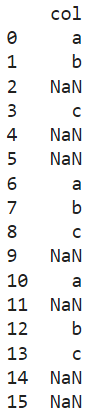</td>
    <td style="text-align: center;">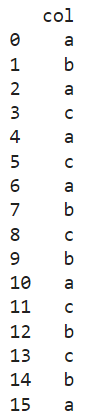</td>
  </tr>
</table>

**Example:** \
If we have 7 NaN and 3 unique value a, b, c:\
&emsp;total_na = 7\
&emsp;len(non_na_values) = 3\
&emsp;times = 3 // 7 = 2\
&ensp;Then the distribution list will be `['a', 'a', 'b', 'b', 'c', 'c']` \
We used '*extend*' instead of '*append*' here such that the above will be displayed and not [['a', 'a'], ['b', 'b'], ['c', 'c']]

After balancing the remaining NaNs, if any:\
&ensp;The disribution list will become `['a', 'a', 'b', 'b', 'c', 'c', 'a']` 

After shuffling:\
&ensp;The distribution list will be shuffled: `['a', 'a', 'c', 'b', 'c', 'b', 'a']` \
Seed is used to ensure reproducibility.\
Shuffling ensures that each value is randomly distributed across the NaN positions.

The distribution list will eventually hold the values that will be used to fill the NaN values in the DataFrame. 

In [11]:
# Calculate the proportional distribution
distribution = []
for value, count in non_na_values.items():
    times = total_na // len(non_na_values)
    distribution.extend([value] * times)

In [12]:
# Balance the remaining NaNs, if any
remaining_na = total_na - len(distribution)
for i in range(remaining_na):
    distribution.append(non_na_values.index[i % len(non_na_values)])

In [13]:
# Shuffle the distribution to randomize (optional)
np.random.seed(42)
np.random.shuffle(distribution)

In [14]:
# Fill the NaN values with the calculated distribution
df.loc[df['customer_city'].isna(), 'customer_city'] = distribution

#### Filling `product_category` NaN

In [15]:
# Make a function to fill NaN
def fill_na(df, col_name):
  # Identify the non-null values and their frequencies
  non_na_values = df[col_name].dropna().value_counts()
  total_na = df[col_name].isna().sum()

  # Calculate the proportional distribution
  distribution = []
  for value, count in non_na_values.items():
      distribution.extend([value] * (total_na // len(non_na_values)))

  # Balance the remaining NaNs, if any
  remaining_na = total_na - len(distribution)
  for i in range(remaining_na):
      distribution.append(non_na_values.index[i % len(non_na_values)])

  # Shuffle the distribution to randomize (optional)
  np.random.seed(42)
  np.random.shuffle(distribution)

  # Fill the NaN values with the calculated distribution
  df.loc[df[col_name].isna(), col_name] = distribution

In [16]:
fill_na(df, 'product_category')

#### Filling `item_price` NaN 

In [17]:
fill_na(df, 'item_price')

#### Filling `connected_handling_time` NaN
For this column, an initial guess is that this may be the calculated difference between the columns `issue_responded` and `issue_reported_at`. After calculating and checking back at the definition, it is found that they are irrelevant. Hence, the same approach is used to fill NaN. 

In [18]:
fill_na(df, 'connected_handling_time')

Now, all NaN values are filled

### Check correlation

In [19]:
# Calculate the correlation matrix for the specified columns
df = pd.get_dummies(columns='manager', drop_first=False, data=df)
df[['manager', 'csat_score']].corr()

ValueError: could not convert string to float: 'Jennifer Nguyen'

#### Dealing with `issue_reported_at` and `issue_responded`
It looks possible to reduce the number of unique values in `issue_reported_at` and `issue_responded` by splitting them into date and time columns. Since the new columns are derived from the old columns, it is uneccesary to check correlation before dropping the two columns.

In [19]:
df[['reported_date', 'reported_time']] = df['issue_reported_at'].str.split(' ', expand=True)

In [20]:
df[['responded_date', 'responded_time']] = df['issue_responded'].str.split(' ', expand=True)

Some issue are reported in July, but responded in August

In [21]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
issue_reported_at,object,0,0,30923
issue_responded,object,0,0,30262
survey_response_date,object,0,0,31
customer_city,object,0,0,1782
product_category,object,0,0,9
item_price,float64,0,0,2789
connected_handling_time,float64,0,0,211


In [22]:
df['reported_date'].unique()

array(['01/08/2023', '02/08/2023', '31/07/2023', '30/07/2023',
       '29/07/2023', '28/07/2023', '03/08/2023', '04/08/2023',
       '05/08/2023', '06/08/2023', '07/08/2023', '08/08/2023',
       '09/08/2023', '10/08/2023', '12/08/2023', '11/08/2023',
       '13/08/2023', '14/08/2023', '15/08/2023', '16/08/2023',
       '17/08/2023', '18/08/2023', '19/08/2023', '20/08/2023',
       '21/08/2023', '22/08/2023', '23/08/2023', '24/08/2023',
       '25/08/2023', '26/08/2023', '27/08/2023', '28/08/2023',
       '29/08/2023', '30/08/2023', '31/08/2023'], dtype=object)

In [23]:
df['responded_date'].unique()

array(['01/08/2023', '02/08/2023', '03/08/2023', '04/08/2023',
       '05/08/2023', '06/08/2023', '07/08/2023', '08/08/2023',
       '09/08/2023', '10/08/2023', '12/08/2023', '11/08/2023',
       '13/08/2023', '14/08/2023', '15/08/2023', '16/08/2023',
       '17/08/2023', '18/08/2023', '19/08/2023', '20/08/2023',
       '21/08/2023', '22/08/2023', '23/08/2023', '24/08/2023',
       '25/08/2023', '26/08/2023', '27/08/2023', '28/08/2023',
       '29/08/2023', '30/08/2023', '31/08/2023'], dtype=object)

In [24]:
# Drop `issue_reported_at` and `issue_responded` 
df.drop(columns = ['issue_reported_at', 'issue_responded'], inplace = True)
df.head(1)

,channel_name,category,sub-category,survey_response_date,customer_city,product_category,item_price,connected_handling_time,agent_name,supervisor,manager,tenure_bucket,agent_shift,csat_score,reported_date,reported_time,responded_date,responded_time
0,Outcall,Product Queries,Life Insurance,01-Aug-23,SRIPERUMPUDUR,Home Appliences,2028.0,424.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,01/08/2023,11:13,01/08/2023,11:47


In [25]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
survey_response_date,object,0,0,31
customer_city,object,0,0,1782
product_category,object,0,0,9
item_price,float64,0,0,2789
connected_handling_time,float64,0,0,211
agent_name,object,0,0,1371
supervisor,object,0,0,40


In [26]:
df.corr(numeric_only=True)

,item_price,connected_handling_time,csat_score
item_price,1.000000,-0.002331,-0.014465
connected_handling_time,-0.002331,1.000000,-0.001962
csat_score,-0.014465,-0.001962,1.000000


In [28]:
df['reported_date'] = pd.to_datetime(df['reported_date'], dayfirst=True)

In [31]:
summary(df)

,data_type,total_na,duplicate,unique
channel_name,object,0,0,3
category,object,0,0,12
sub-category,object,0,0,57
survey_response_date,object,0,0,31
customer_city,object,0,0,1782
product_category,object,0,0,9
item_price,float64,0,0,2789
connected_handling_time,float64,0,0,211
agent_name,object,0,0,1371
supervisor,object,0,0,40


In [30]:
df.corr(numeric_only=True)

,item_price,connected_handling_time,csat_score
item_price,1.000000,-0.002331,-0.014465
connected_handling_time,-0.002331,1.000000,-0.001962
csat_score,-0.014465,-0.001962,1.000000


In [1]:
# Calculate the correlation matrix for the specified columns
df[['manager', 'csat_score']].corr()

NameError: name 'df' is not defined

In [32]:
# Identify categorical data and dummify them
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(columns=categorical_cols, drop_first=True, data=df)

In [33]:
df.head(3)

,item_price,connected_handling_time,csat_score,reported_date,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,...,responded_time_23:50,responded_time_23:51,responded_time_23:52,responded_time_23:53,responded_time_23:54,responded_time_23:55,responded_time_23:56,responded_time_23:57,responded_time_23:58,responded_time_23:59
0,2028.0,424.0,5,2023-08-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,20370.0,533.0,5,2023-08-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,840.0,722.0,5,2023-08-01,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
df.shape

(85907, 6170)

In [30]:
df.corr()

,item_price,connected_handling_time,csat_score,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,category_Order Related,...,responded_time_23:50,responded_time_23:51,responded_time_23:52,responded_time_23:53,responded_time_23:54,responded_time_23:55,responded_time_23:56,responded_time_23:57,responded_time_23:58,responded_time_23:59
item_price,1.000000,-0.002331,-0.014465,0.004302,-0.003839,0.005192,-0.008918,0.005005,0.002780,0.014057,...,-0.003645,-0.004534,-0.003198,0.003281,-0.002007,-0.000400,0.000444,0.001563,0.000184,-0.001520
connected_handling_time,-0.002331,1.000000,-0.001962,-0.000113,0.000676,0.001154,-0.000016,0.001233,0.002129,-0.001245,...,0.000305,-0.000287,0.001086,-0.003934,0.000085,0.000256,0.001049,-0.006412,-0.006115,0.004361
csat_score,-0.014465,-0.001962,1.000000,0.013088,0.009160,-0.029669,-0.010028,-0.001725,0.000387,-0.064475,...,0.010016,-0.000572,0.007802,0.003004,0.002994,0.000320,-0.002009,0.004666,0.000801,0.001038
channel_name_Inbound,0.004302,-0.000113,0.013088,1.000000,-0.891394,-0.019521,0.001673,0.008969,0.002552,0.007812,...,0.004837,0.000088,-0.001569,0.002029,-0.002611,-0.001561,-0.003739,-0.003318,0.000630,0.004443
channel_name_Outcall,-0.003839,0.000676,0.009160,-0.891394,1.000000,0.023667,-0.009702,-0.009265,-0.000173,-0.024457,...,-0.003285,0.001895,0.003401,-0.001777,0.001895,0.000703,0.002303,0.005604,0.001363,-0.003087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
responded_time_23:55,-0.000400,0.000256,0.000320,-0.001561,0.000703,0.000075,0.006817,-0.001577,-0.000579,-0.002828,...,-0.000431,-0.000448,-0.000387,-0.000431,-0.000448,1.000000,-0.000497,-0.000460,-0.000460,-0.000380
responded_time_23:56,0.000444,0.001049,-0.002009,-0.003739,0.002303,0.005486,-0.000861,-0.001772,-0.000651,0.004469,...,-0.000484,-0.000504,-0.000434,-0.000484,-0.000504,-0.000497,1.000000,-0.000517,-0.000517,-0.000427
responded_time_23:57,0.001563,-0.006412,0.004666,-0.003318,0.005604,-0.003552,-0.003619,-0.001638,-0.000601,-0.001296,...,-0.000447,-0.000466,-0.000402,-0.000447,-0.000466,-0.000460,-0.000517,1.000000,-0.000477,-0.000395
responded_time_23:58,0.000184,-0.006115,0.000801,0.000630,0.001363,0.003178,-0.003619,0.005512,-0.000601,-0.007296,...,-0.000447,-0.000466,-0.000402,-0.000447,-0.000466,-0.000460,-0.000517,-0.000477,1.000000,-0.000395


In [35]:
# Select a subset of columns
selected_columns = df.columns[:100]  # first 100 columns as an example
subset_df = df[selected_columns]
corr_matrix = subset_df.corr()

In [36]:
corr_matrix

,item_price,connected_handling_time,csat_score,reported_date,channel_name_Inbound,channel_name_Outcall,category_Cancellation,category_Feedback,category_Offers & Cashback,category_Onboarding related,...,survey_response_date_19-Aug-23,survey_response_date_20-Aug-23,survey_response_date_21-Aug-23,survey_response_date_22-Aug-23,survey_response_date_23-Aug-23,survey_response_date_24-Aug-23,survey_response_date_25-Aug-23,survey_response_date_26-Aug-23,survey_response_date_27-Aug-23,survey_response_date_28-Aug-23
item_price,1.000000,-0.002331,-0.014465,0.001433,0.004302,-0.003839,0.005192,-0.008918,0.005005,0.002780,...,0.003870,0.003994,0.003285,0.005903,-0.001071,0.001183,0.002319,-0.002812,-0.001704,0.002575
connected_handling_time,-0.002331,1.000000,-0.001962,0.005933,-0.000113,0.000676,0.001154,-0.000016,0.001233,0.002129,...,0.006046,-0.008689,0.000599,0.000300,-0.000087,0.001275,0.005609,-0.006092,0.007426,0.002483
csat_score,-0.014465,-0.001962,1.000000,0.038098,0.013088,0.009160,-0.029669,-0.010028,-0.001725,0.000387,...,-0.004042,-0.000048,0.000360,0.000612,0.006083,0.011092,0.002661,0.008657,0.012236,0.014575
reported_date,0.001433,0.005933,0.038098,1.000000,-0.100599,0.087360,-0.004158,0.010591,-0.013066,0.013223,...,0.049661,0.065430,0.089683,0.120190,0.140337,0.162070,0.169024,0.205701,0.242269,0.268042
channel_name_Inbound,0.004302,-0.000113,0.013088,-0.100599,1.000000,-0.891394,-0.019521,0.001673,0.008969,0.002552,...,-0.027524,-0.041976,-0.088051,-0.065012,-0.035263,-0.054422,-0.007736,0.002715,0.014158,-0.016413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
survey_response_date_24-Aug-23,0.001183,0.001275,0.011092,0.162070,-0.054422,0.052575,0.003517,-0.003599,0.003809,-0.005200,...,-0.032689,-0.030728,-0.032784,-0.035978,-0.035598,1.000000,-0.033052,-0.035885,-0.038238,-0.038666
survey_response_date_25-Aug-23,0.002319,0.005609,0.002661,0.169024,-0.007736,0.007897,-0.005482,0.000811,-0.001148,0.007660,...,-0.030256,-0.028441,-0.030343,-0.033300,-0.032948,-0.033052,1.000000,-0.033213,-0.035391,-0.035787
survey_response_date_26-Aug-23,-0.002812,-0.006092,0.008657,0.205701,0.002715,-0.002880,0.003212,0.001638,-0.002306,0.010943,...,-0.032849,-0.030879,-0.032944,-0.036154,-0.035772,-0.035885,-0.033213,1.000000,-0.038424,-0.038854
survey_response_date_27-Aug-23,-0.001704,0.007426,0.012236,0.242269,0.014158,-0.012524,0.004535,-0.001200,-0.005527,-0.001212,...,-0.035003,-0.032903,-0.035104,-0.038524,-0.038117,-0.038238,-0.035391,-0.038424,1.000000,-0.041402


In [ ]:
def find_highly_correlated(df, threshold=0.7):
    corr_matrix = df.corr().abs()
    high_corr_pairs = np.where((corr_matrix > threshold) & (corr_matrix != 1))
    high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs)]
    
    return high_corr_pairs

high_corr_pairs = find_highly_correlated(df)

%%time

In [ ]:
from sklearn.decomposition import PCA

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df)
Scaled_data=scaling.transform(df)
 
# Set the n_components=60
principal=PCA(n_components=60)
reduced_data = pca.fit_transform(Scaled_data)

# Check the dimensions of data after PCA
print(reduced_data.shape)

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=100)
reduced_data = pca.fit_transform(df)

# Convert to DataFrame
reduced_df = pd.DataFrame(reduced_data)

# Compute correlation matrix
corr_matrix = reduced_df.corr()